In [16]:
import tensorflow as tf

print(tf.__version__)

2.9.1


In [17]:
fmnist = tf.keras.datasets.fashion_mnist

In [18]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

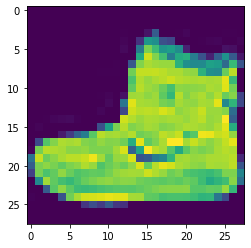

In [21]:
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [22]:
#normalize the pictures

training_images = training_images / 255.0
test_images = test_images / 255.0

In [23]:
#model classification

model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# Sequential -> That defines a sequence of layers in the neural network.

# Flatten -> Flattentakes that square and turns it into a 1-dimensional array.

# [Dense] Adds a layer of neurons

# Each layer of neurons need an [activation function]to tell them what to do. 
# There are a lot of options, but just use these for now: 

# ReLU

# ```
# if x > 0: 
#   return x

# else: 
#   return 0
# ```

# Only passes values 0 or greater to the next layer in the network.

# [Softmax]takes a list of values and scales these so the sum of all elements will be equal to 1. 
# When applied to model outputs, you can think of the scaled values as the probability for that class. 

# For example, in your classification model which has 10 units in the output dense layer, 
# having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. 
# If it is at index = 5, then it is a sandal, and so forth. 

#See the short code block below which demonstrates these concepts. 
# You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) 
# if you want to know more about the Softmax function and how the values are computed.


In [26]:
print(model.summary())

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [28]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]


In [29]:
# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]


In [30]:
# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

sum of outputs: 1.0


In [31]:
# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

class with highest probability: 2


In [36]:
#Compile the model

model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [39]:
model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4151 - accuracy: 0.8562
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4033 - accuracy: 0.8599
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3942 - accuracy: 0.8640
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3843 - accuracy: 0.8668
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8688
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3697 - accuracy: 0.8715
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3635 - accuracy: 0.8741
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3575 - accuracy: 0.8759
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3518 - accuracy: 0.8768
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.346

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

In [41]:
#Exercise

classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[1.1758310e-05 1.1492727e-06 1.0255449e-05 5.5059504e-06 3.7717286e-06 6.6554949e-02 1.2546600e-04 2.7661579e-02 1.9862778e-03 9.0363920e-01]


In [43]:
print(test_labels[0])

9


# What does this list represent?

These numbers are a probability that the value being classified is the corresponding value

Exercise 2

In [44]:
mnist = tf.keras.datasets.mnist

In [45]:
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [46]:
training_images = training_images/255.0
test_images = test_images/255.0

In [47]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [50]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0231 - accuracy: 0.9922
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0171 - accuracy: 0.9943
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0140 - accuracy: 0.9952
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0141 - accuracy: 0.9952
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0974 - accuracy: 0.9816


[0.09735479950904846, 0.9815999865531921]

In [49]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 4ms/step
[2.2220761e-10 2.8491620e-10 5.9206620e-08 1.3749467e-06 1.3756394e-15 1.8716005e-10 1.0423245e-14 9.9999851e-01 6.4953048e-10 3.8387662e-10]
7


In [53]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: in user code:

    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/home/fadilrisdian/.local/lib/python3.10/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


Error Result
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

lets try with adding some layers

In [56]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2951 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1012 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0812 - accuracy: 0.9749
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[3.2899683e-07 1.6417985e-09 6.0323138e-05 5.9153674e-05 1.4028464e-08 4.3511509e-08 1.4485049e-11 9.9986339e-01 3.1829893e-07 1.6590620e-05]
7


In [57]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2243 - accuracy: 0.9348
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0942 - accuracy: 0.9713
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0675 - accuracy: 0.9785
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9835
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.1619173e-06 1.5714310e-08 1.0629914e-06 6.9929683e-07 4.7132902e-09 7.7500856e-10 4.0957671e-12 9.9985743e-01 3.6145718e-08 1.3968255e-04]
7


Consider the impact of training for more or less epochs

In [58]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2635
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1156
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0799
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0601
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0364
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0290
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0190
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0159
Epoch 11/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0127
Epoch 12/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107
E

In [ ]:
# try with removing normalizing data

In [59]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0 # Experiment with removing this line
# test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.6045
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3460
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3173
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2699
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[1.5289117e-31 1.0079799e-18 2.0614623e-22 4.0476194e-14 2.7513611e-31 1.6052409e-23 0.0000000e+00 9.9999994e-01 8.2800567e-22 9.5153979e-21]
7


the loss is high

In [60]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.4780 - accuracy: 0.8298
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4778 - accuracy: 0.8297
